# HEALTHCARE ANALYSIS ON HEART DISEASE DATA

In [1]:
# IMPORTING DATA AND EXPLORING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = (6, 4)
sns.set_style('whitegrid')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [3]:
hd = pd.read_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Heart_new2.csv")


In [4]:
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      4500 non-null   object 
 1   BMI               4500 non-null   float64
 2   Smoking           4500 non-null   object 
 3   AlcoholDrinking   4500 non-null   object 
 4   Stroke            4500 non-null   object 
 5   PhysicalHealth    4500 non-null   int64  
 6   MentalHealth      4500 non-null   int64  
 7   DiffWalking       4500 non-null   object 
 8   Sex               4500 non-null   object 
 9   AgeCategory       4500 non-null   object 
 10  Race              4500 non-null   object 
 11  Diabetic          4500 non-null   object 
 12  PhysicalActivity  4500 non-null   object 
 13  GenHealth         4500 non-null   object 
 14  SleepTime         4500 non-null   int64  
 15  Asthma            4500 non-null   object 
 16  KidneyDisease     4500 non-null   object 


In [6]:
hd.shape

(4500, 18)

In [7]:
hd.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
type(hd)

pandas.core.frame.DataFrame

In [9]:
hd.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# EDA (Exploratory Data Analysis)

Using Data Visualization

1.age: Patients age in years

2.sex : Female or male (1-Male,0-Female)

3.cp :Chest pain ( 1- Typical Angina, 2-Atypical Angina,3-Non- anginal pain, 4-Asymptomatic)

4.trestbp: Resting BloodPressure

5.chol :Cholestrol 

6.fbs  : Fasting Blood Sugar( >120 mg/dl, 1-True, 0 - False)

7.restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach :The person's maximum heart rate achieved

9.exang : Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope  : the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca    :The number of major vessels (0-3)

13.thal  : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target : Heart disease (0 = no, 1 = yes)


In [11]:
hd.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,29.340040,4.105111,4.439778,7.043333
std,6.676625,8.573743,8.593363,1.595765
min,12.480000,0.000000,0.000000,1.000000
25%,24.687500,0.000000,0.000000,6.000000
50%,28.250000,0.000000,0.000000,7.000000
75%,33.000000,3.000000,5.000000,8.000000
max,75.820000,30.000000,30.000000,20.000000


In [12]:
pd.set_option('display.float_format','{:.2f}'.format)

In [13]:
hd.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,4500.00,4500.00,4500.00,4500.00
mean,29.34,4.11,4.44,7.04
std,6.68,8.57,8.59,1.60
min,12.48,0.00,0.00,1.00
25%,24.69,0.00,0.00,6.00
50%,28.25,0.00,0.00,7.00
75%,33.00,3.00,5.00,8.00
max,75.82,30.00,30.00,20.00


In [15]:
hd['HeartDisease'].value_counts()


HeartDisease
No     4017
Yes     483
Name: count, dtype: int64

In [16]:
hd.shape

(4500, 18)

In [17]:
hd['HeartDisease'].value_counts()/hd.shape[0]*100

HeartDisease
No    89.27
Yes   10.73
Name: count, dtype: float64

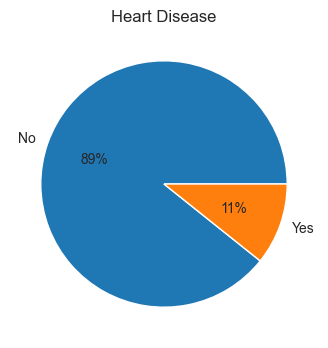

In [19]:
# percentage of positive and negative heart diseases
labels = hd['HeartDisease'].value_counts().index
values = hd['HeartDisease'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


# Histagram plot for all feature

In [20]:
import itertools

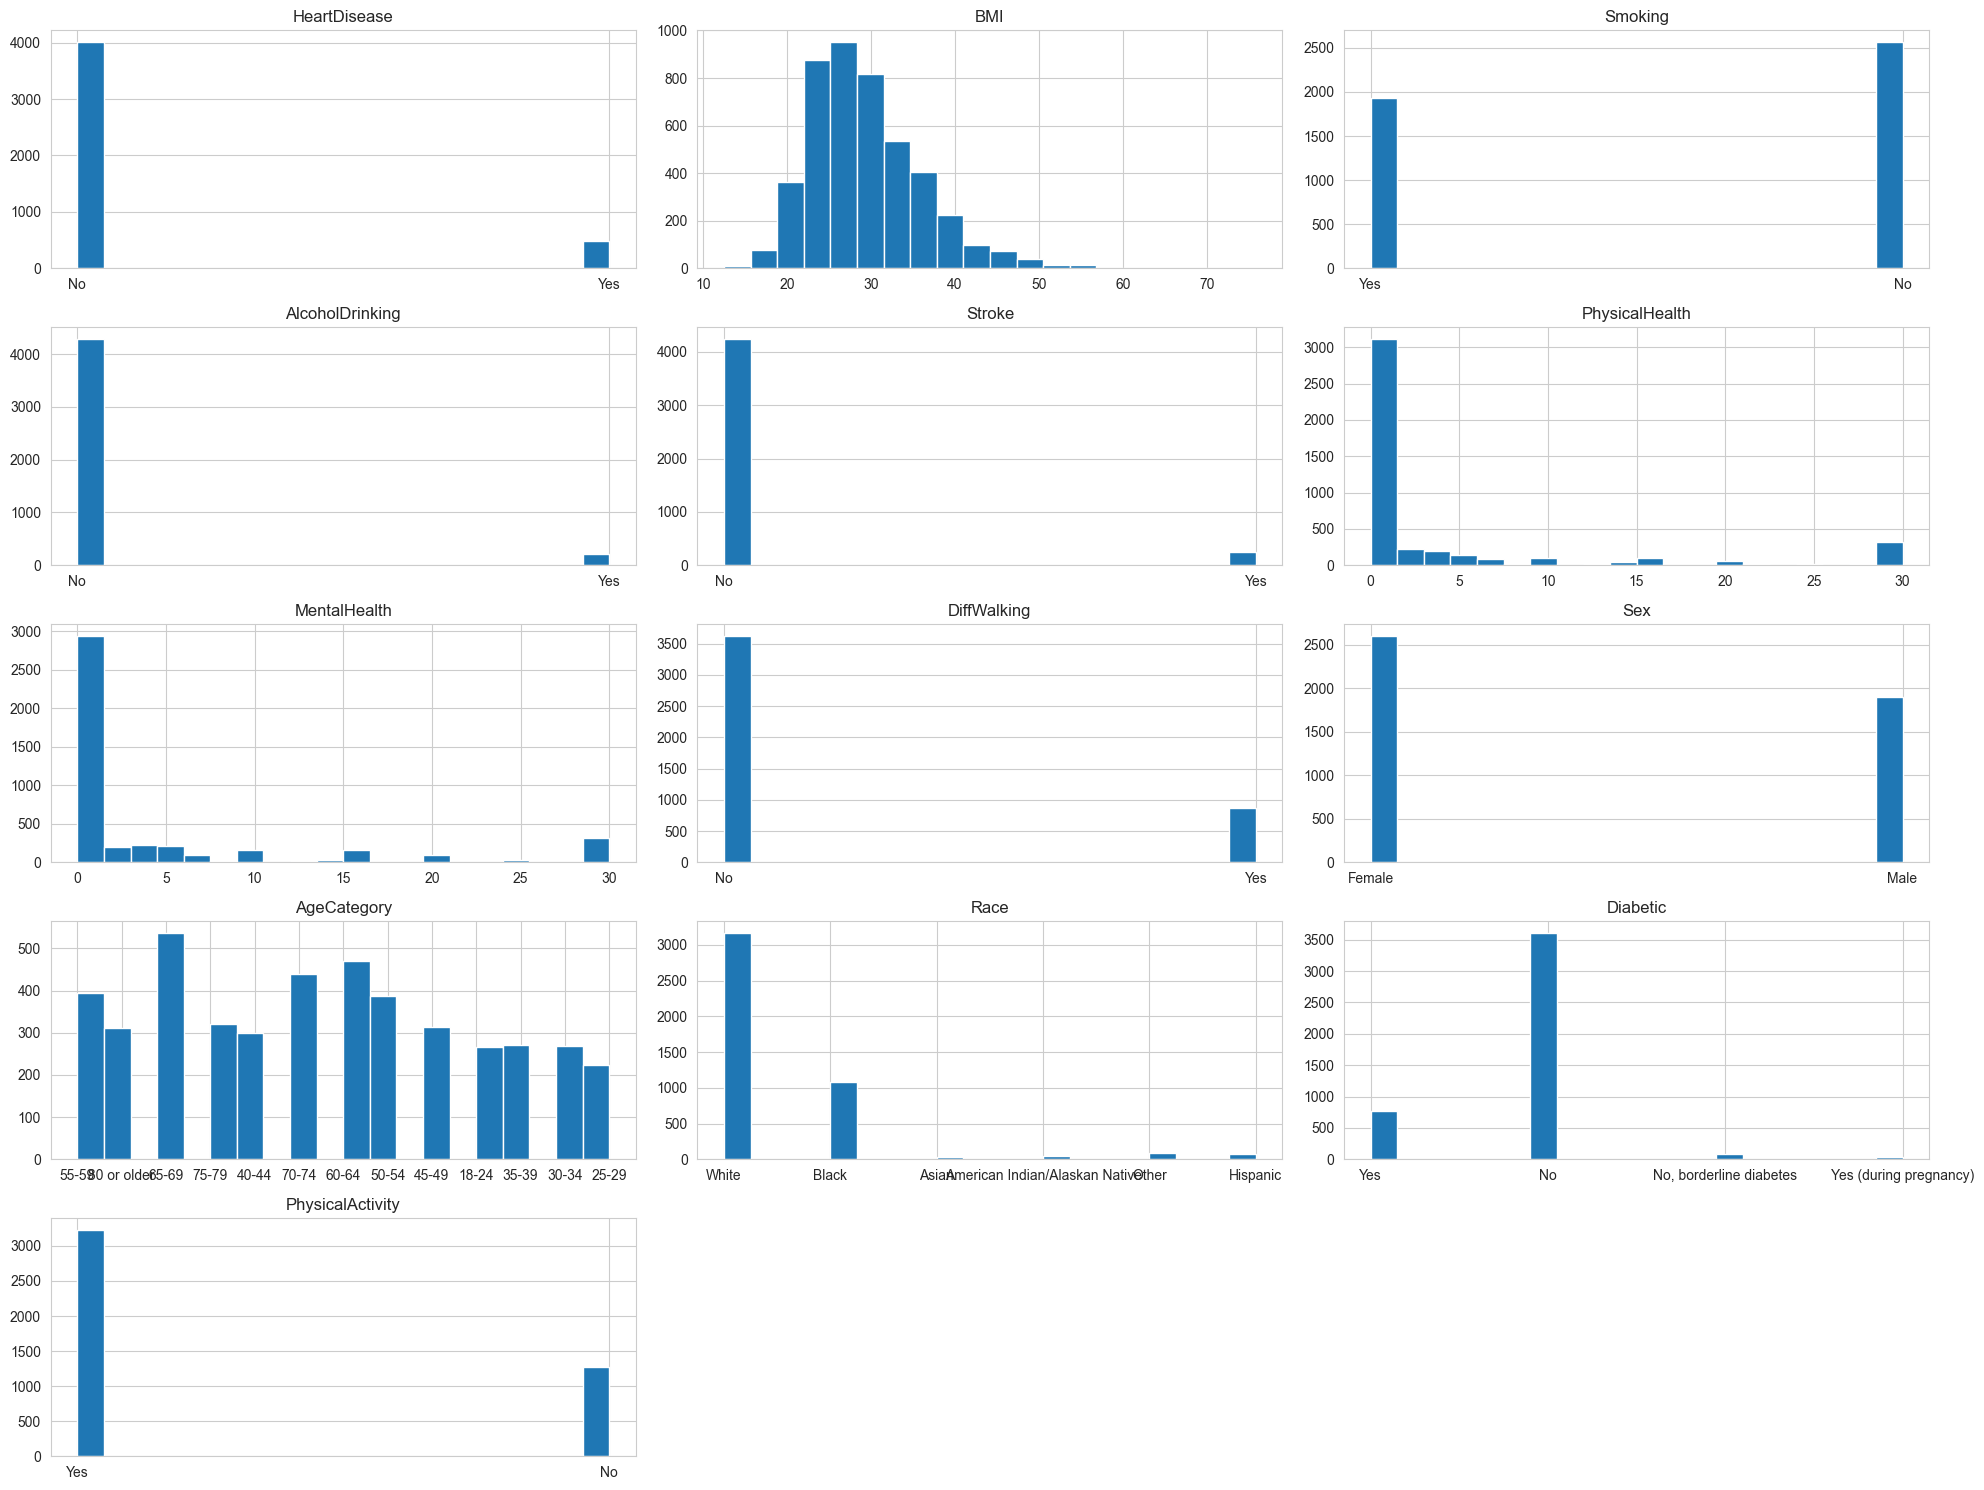

In [21]:
import math
import matplotlib.pyplot as plt
import itertools

col = hd.columns[:13]
plt.figure(figsize=(20, 15))

length = len(col)
rows = math.ceil(length / 3)

for j, i in enumerate(col):
    plt.subplot(rows, 3, j + 1)
    hd[i].hist(bins=20)
    plt.title(i)

plt.tight_layout()
plt.show()


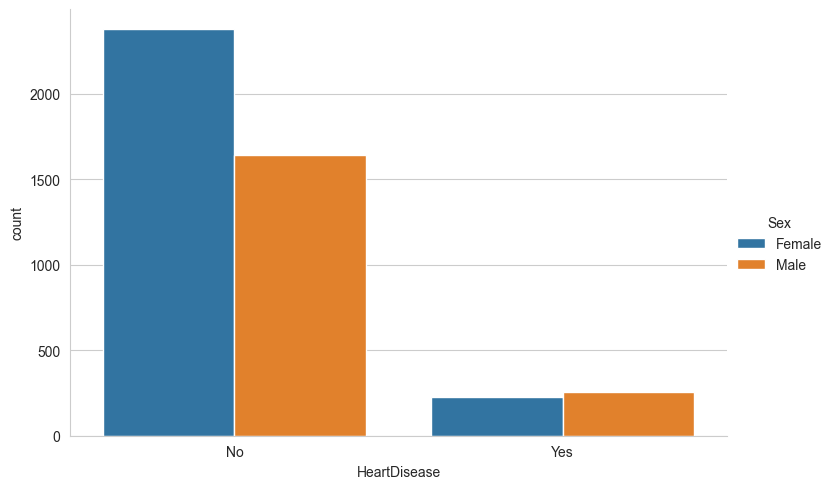

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x='HeartDisease',
    data=hd,
    hue='Sex',
    kind='count',
    height=5,
    aspect=1.5
)

plt.show()


In [24]:
hd.rename(columns={'Sex': 'sex'}, inplace=True)
hd['sex'].value_counts()


sex
Female    2604
Male      1896
Name: count, dtype: int64

From the above Histogram plots we can conclude Age, Cholestrol, Resting blood pressure and person's maximum heart rate achieved 
plays major role in detection of Heart Disease.

From the another plot we can conclude that number of  men are majorly having Heart disease than compared to females.And also men are more healthier than females

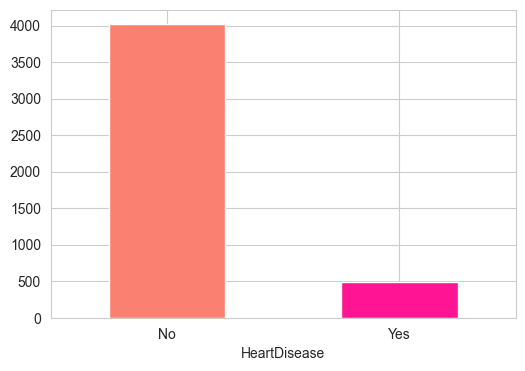

In [25]:
hd['HeartDisease'].value_counts().plot(kind='bar', color=["salmon", "deeppink"])
plt.xticks(rotation=0)
plt.show()


In [26]:
# Possibility of having Heart Disease 
#Creating a Function for unique values in data
categorical_values = []
for column in hd.columns:
    print('==============================')
    print(f"{column} : {hd[column].unique()}")
    if len(hd[column].unique()) <= 10:
        categorical_values.append(column)


HeartDisease : ['No' 'Yes']
BMI : [16.6  20.34 26.58 ... 25.52 37.02 54.75]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13]
MentalHealth : [30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27]
DiffWalking : ['No' 'Yes']
sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5  7  8  6 12  4  9 10 15  3  2  1 16 18 14 20 11]
Asthma : ['Yes' 'No']
KidneyDisease : ['No' 'Yes']
SkinCancer : ['Yes' 'No']


ValueError: Could not interpret value `smoking` for `x`. An entry with this name does not appear in `data`.

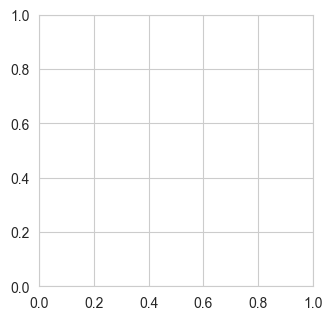

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=hd, x=column, y='target')
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


The possibility of having Heart Disease can be judged from the above barplots.

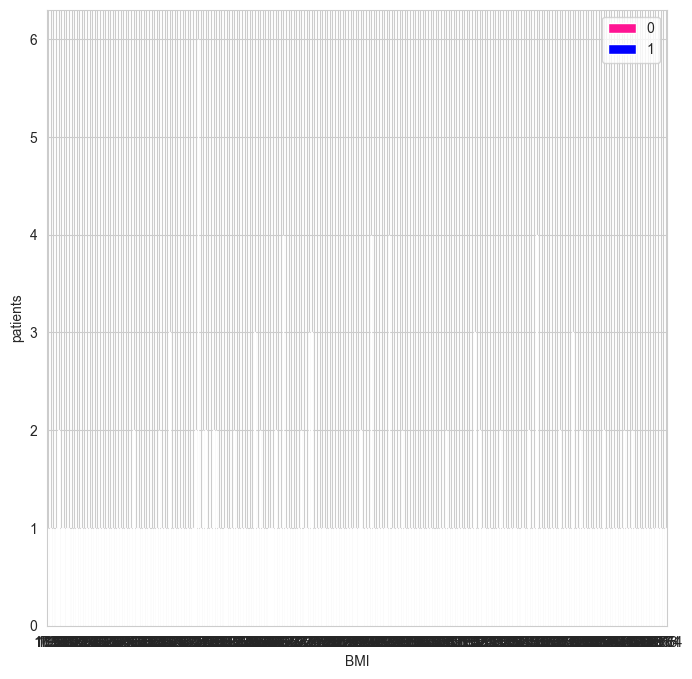

In [33]:
pd.crosstab(hd['BMI'][::15], hd['target']).plot(
    kind="bar",
    figsize=(8, 8),
    color=["deeppink", "blue"]
)

plt.ylabel("patients")
plt.xticks(rotation=0)
plt.legend(['0', '1'])
plt.show()


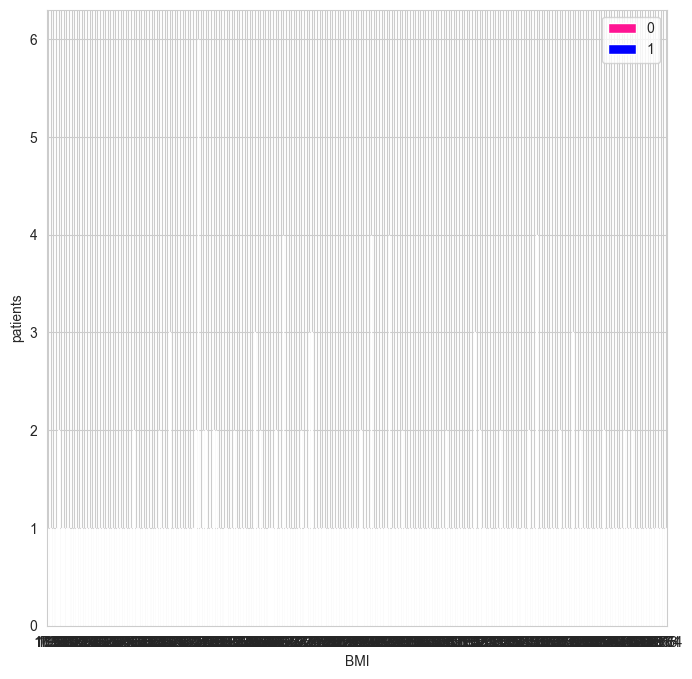

In [35]:
pd.crosstab(hd['BMI'][::15], hd['target']).plot(
    kind="bar",
    figsize=(8, 8),
    color=["deeppink", "blue"]
)

plt.ylabel("patients")
plt.xticks(rotation=0)
plt.legend(['0', '1'])
plt.show()


The above graph tells us that patients with Type 3 chest pain have heart disease.
and verty few Patients with 1 type chest pain have heart disease

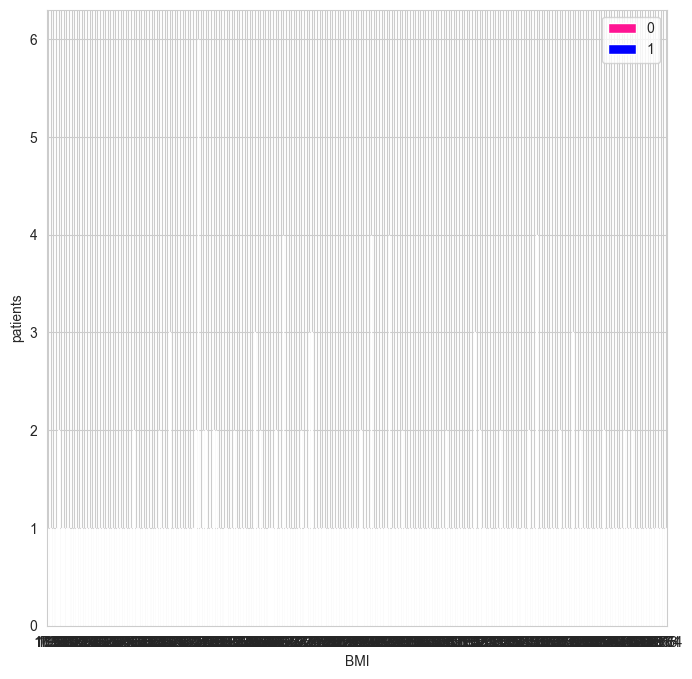

In [36]:
pd.crosstab(hd['BMI'][::15], hd['target']).plot(
    kind="bar",
    figsize=(8, 8),
    color=["deeppink", "blue"]
)

plt.ylabel("patients")
plt.xticks(rotation=0)
plt.legend(['0', '1'])
plt.show()


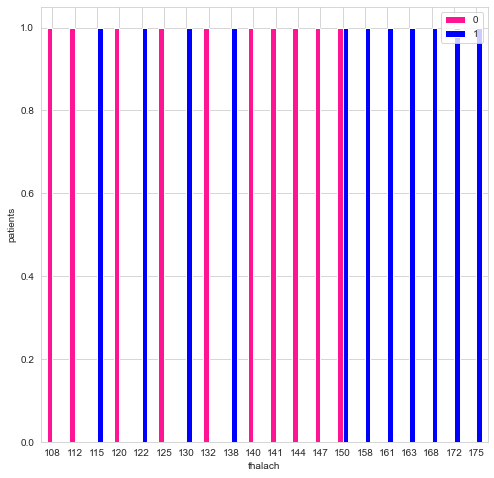

In [28]:
# Comparing maximum heart rate with target
pd.crosstab(hd.thalach[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']);

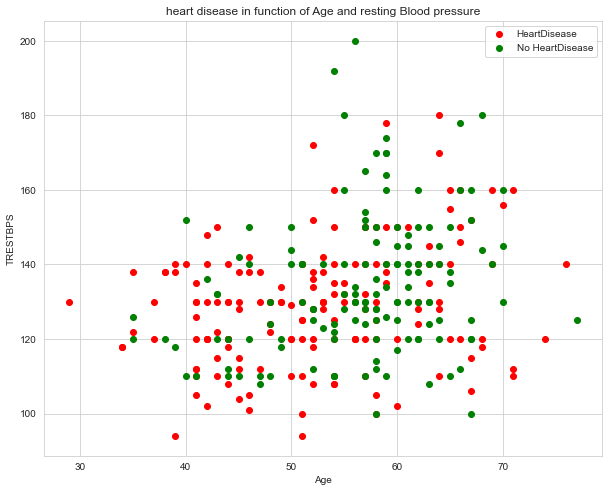

In [29]:
# fINDING Heart Disease PEOPLE WITH restingBloodPressure AND AGE  USING SCATTER PLOT

plt.figure(figsize=(10,8))
plt.scatter(hd.age[hd.target==1],hd.trestbps[hd.target==1],color="Red")

plt.scatter(hd.age[hd.target==0],hd.trestbps[hd.target==0],color="Green")

plt.title("heart disease in function of Age and resting Blood pressure")
plt.xlabel("Age")
plt.ylabel("TRESTBPS")
plt.legend(["HeartDisease","No HeartDisease"]);

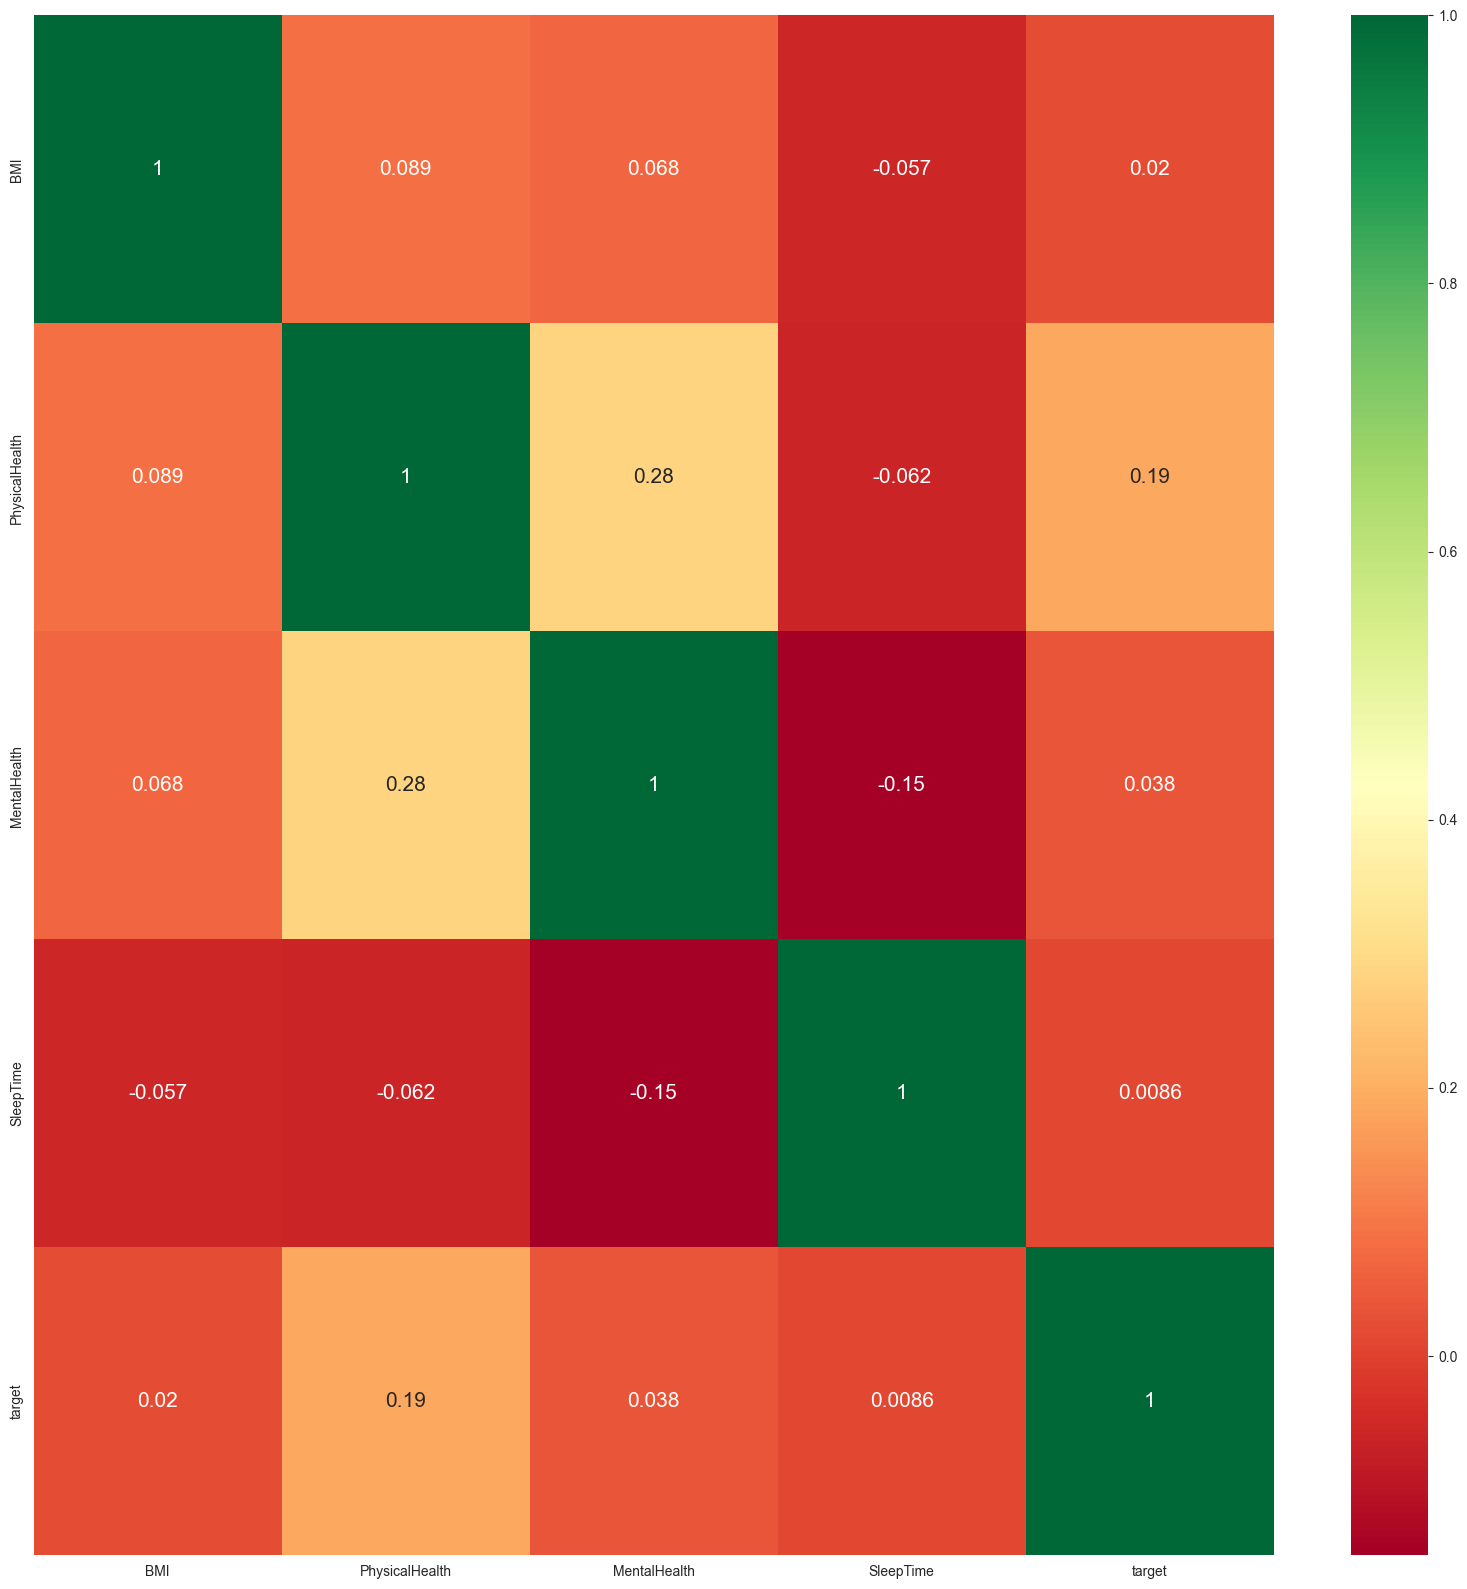

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_hd = hd.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_hd.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="RdYlGn",
    annot_kws={"size": 15}
)
plt.show()


# OBSERVATION

1. Major features for having Heart diesease are : Resting blood pressure, Cholestrol, Chest pain and Maximum Heart rates achieved.
2. The data is not disbalanced.
3. From the another plot we can conclude that number of men are majorly having Heart disease than compared to females.And also men are more healthier than females.
4. The graph tells us that patients with Type 3 chest pain have heart disease and very few Patients with 1 type chest pain can have heart disease.


In [39]:
# creating a copy of dataset 
heart = hd.copy()

In [40]:
heart.shape

(4500, 19)

In [41]:
heart = heart.rename(columns={'condition':'target'})
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,target
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,0
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,0
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,0
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,0


# Lets divide our data set and use  training dataset for model training, and test dataset is to eveluate model perfomance

In [42]:
from sklearn.model_selection import train_test_split

x= heart.drop(columns= 'target')
y= heart.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (3375, 18), X_test size: (1125, 18)


feature scaling

In [48]:
X = hd.drop('target', axis=1)
y = hd['target']

X_encoded = pd.get_dummies(X, drop_first=True)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)




# Linear regression

In [36]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(x_train_scaler, y_train)
y_pred_lr= lr_clf.predict(x_test_scaler)
lr_clf.score(x_test_scaler,y_test)

0.5377610331681861

LinearRegression is not the suitable model

# LOGISTIC REGRESSION

In [49]:
from sklearn.linear_model import LogisticRegression

logr_clf= LogisticRegression()
logr_clf.fit(x_train_scaler, y_train)
y_pred_lor= logr_clf.predict(x_test_scaler)
logr_clf.score(x_test_scaler,y_test)

1.0

In [50]:
print('Classification Report\n', classification_report(y_test, y_pred_lor))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_lor)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00        86

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Accuracy: 100.0%



In [51]:
cm = confusion_matrix(y_test, y_pred_lor)
cm

array([[814,   0],
       [  0,  86]])

# Decision Tree classifier

In [52]:
dt_clf= LogisticRegression()
dt_clf.fit(x_train_scaler, y_train)
y_pred_dct= dt_clf.predict(x_test_scaler)
dt_clf.score(x_test_scaler,y_test)

1.0

In [53]:
print('Classification Report\n', classification_report(y_test, y_pred_dct))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_dct)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00        86

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Accuracy: 100.0%



In [54]:
cm = confusion_matrix(y_test, y_pred_dct)
cm

array([[814,   0],
       [  0,  86]])

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= LogisticRegression()
rf_clf.fit(x_train_scaler, y_train)
y_pred_rfc= rf_clf.predict(x_test_scaler)
rf_clf.score(x_test_scaler,y_test)

1.0

In [56]:
print('Classification Report\n', classification_report(y_test, y_pred_rfc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_rfc)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00        86

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Accuracy: 100.0%



In [57]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[814,   0],
       [  0,  86]])

# SVC

In [58]:
from sklearn.svm import SVC

svc_clf= LogisticRegression()
svc_clf.fit(x_train_scaler, y_train)
y_pred_svc= svc_clf.predict(x_test_scaler)
svc_clf.score(x_test_scaler,y_test)

1.0

In [59]:
print('Classification Report\n', classification_report(y_test, y_pred_svc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_svc)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00        86

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Accuracy: 100.0%



In [60]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[814,   0],
       [  0,  86]])

In [61]:
import pickle

filename = 'Healthcare_Analysis_on_Heart_Disease.pkl'
pickle.dump(rf_clf, open(filename, 'wb'))